## TANZANIA WATER PROJECT
## ADD IMAGE

# Objective of the study

    Overview 

Tanzania, as a developing country, struggles with providing clean water to its population of over 57,000,000. There are many water points already established in the country, but some are in need of repair while others have failed altogether.


Through this analysis we are going to answer the following questions:

1. To identify which factors contribute to functionality of the well:
Does source of water influence the functionality of the wells?

Does Age effect the condition of the wells?

Does having Public Meetings help to keep the wells functional?

2. What is the best mode of payment for maintainence of wells?

3. To predict which pumps are functional

# Data description
The datasets obtained were from https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/ of which provided four datasets whereby
we had 

* Submission format which was the format of submitting the predictions, 

* Test set values which contained the independent variables that need prediction,

* Training set labels which contains the dependent variable (status_group) for each of the rows in Training set values and lastly the

* Training set values which contains the independent variables for the training set

Some of the features in this dataset are:

amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

num_private -

basin - Geographic water basin


subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint



we also have the labels in the dataset whic are;

functional - the waterpoint is operational and there are no repairs needed

functional needs repair - the waterpoint is operational, but needs repairs

non functional - the waterpoint is not operational

# Stakeholder
 Government Ministry of water & NGO's that will find this information useful in order to decide on which wells to repair and how much to allocate to each of them.

In [1]:
# we start by importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn import tree


In [2]:
#lets first view all the datasets to confirm on what they entail
df1 = pd.read_csv("Training set labels.csv") #this is the target class dataset
df2 = pd.read_csv("Test set values.csv")
df3 = pd.read_csv("Training set values.csv")

In [3]:
df1.head()
#we cann see this is our target class or rather the dependent variables

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
df2.head()
#We see that these are the independent variables that need predictions

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [5]:
df3.head()
#these are the independent variables for the training set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
#so we will combine our training dataframe with the dependent datframe
#we use inner to return the rows where the key only exists in both of them
data = pd.merge (df1, df3, on='id', how='inner')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

The target feature in this dataset is the 'status_group' feature. This feature is an indicator of whether or not the water well is 'functional', 'functional needs repairs', or 'non functional'.

Also this are some of the features we are going to use:

.amount_tsh: Amount water available to waterpoint

.date_recorded: The date the row was entered

.funder: Who funded the well

.gps_height: Altitude of the well

.installer: Organization that installed the well

.longitude: GPS coordinate

.latitude: GPS coordinate

.wpt_name: Name of the waterpoint if there is one

Among others.

## Data cleaning

In [20]:
data.isna().sum()
#we will analyze these missing varoables later on

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

Lets visualize our target and compare to other features

In [8]:
# Convert the 'status_group' column to a categorical data type so that it can be easily converted into numerical codes later
data['status_group'] = data['status_group'].astype('category')

# Convert the categorical values into numerical codes and creating  a new column
data['target'] = data['status_group'].cat.codes

# Display the counts of each numerical code in the 'target' column
data['target'].value_counts()

0    32259
2    22824
1     4317
Name: target, dtype: int64

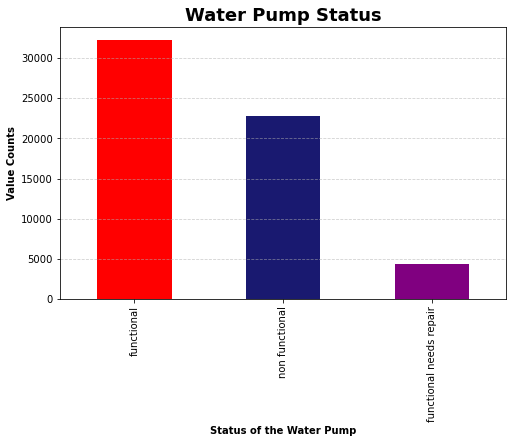

In [10]:
#Now we can plot them
# Plotting the value counts of the 'status_group' column in descending order using a bar plot
data['status_group'].value_counts(ascending=False).plot(kind='bar', figsize=(8,5), color=['red','midnightblue','purple'])

# Adding a title to the plot with a larger font size and bold font weight
plt.title("Water Pump Status", fontweight='bold', fontsize=18)

# Adding a label to the x-axis with a larger font size, bold font weight, and descriptive text
plt.xlabel('Status of the Water Pump', fontweight='bold', fontsize=10)

# Adding a label to the y-axis with a larger font size, bold font weight, and descriptive text
plt.ylabel('Value Counts', fontweight='bold', fontsize=10)

# Adding gridlines to the plot along the y-axis with a dashed linestyle and reduced opacity
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Displaying the plot
plt.show()


It is clear that there's plenty of imbalance in our classes. We will therefore combine the non-functional and functional needs repair into one class so that eventually we can drop the status group and use the target column

In [11]:
# Replace "functional needs repair" and "non functional" with "needs repair" in the 'status_group' column
data['status_group'] = data['status_group'].replace(to_replace=["functional needs repair", "non functional"], value="needs repair")

# Display the value counts of each category in the 'status_group' column after replacement
data['status_group'].value_counts()

functional      32259
needs repair    27141
Name: status_group, dtype: int64

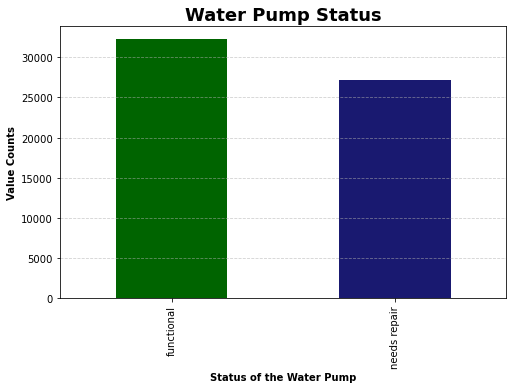

In [12]:
# Plotting the value counts of the 'status_group' column in descending order using a bar plot
data['status_group'].value_counts(ascending=False).plot(kind='bar', figsize=(8,5), color=['darkgreen','midnightblue','purple'])

# Adding a title to the plot with a larger font size and bold font weight
plt.title("Water Pump Status", fontweight='bold', fontsize=18)

# Adding a label to the x-axis with a larger font size, bold font weight, and descriptive text
plt.xlabel('Status of the Water Pump', fontweight='bold', fontsize=10)

# Adding a label to the y-axis with a larger font size, bold font weight, and descriptive text
plt.ylabel('Value Counts', fontweight='bold', fontsize=10)

# Adding gridlines to the plot along the y-axis with a dashed linestyle and reduced opacity
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Displaying the plot
plt.show()


In [15]:
# Convert the 'status_group' column to a categorical data type
data['status_group'] = data['status_group'].astype('category')

# Convert the categorical values into numerical codes
data['target'] = data['status_group'].cat.codes

# Display the counts of each numerical code in the 'target' column
data['target'].value_counts()

0    32259
1    27141
Name: target, dtype: int64

In [16]:
data.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,67743,needs repair,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0


In [17]:
# Calculate the relative frequency of each unique value in the 'status_group' column
data['status_group'].value_counts(normalize=True)

functional      0.543081
needs repair    0.456919
Name: status_group, dtype: float64

We are going to use these numbers as a baseline when comparing subgroups. For example,if a region has less than 54% functionality, we know they are below average and some features within that region are effecting the functionality of the wells.

This will help us identify important features more easily, and give us references for further data exploration.

In [18]:
# create dummies for status group to make plotting easier
dummies_status = pd.get_dummies(data['status_group'])
data = data.join(dummies_status) #to add the dummy variables back to the original dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     59400 non-null  int64   
 1   status_group           59400 non-null  category
 2   amount_tsh             59400 non-null  float64 
 3   date_recorded          59400 non-null  object  
 4   funder                 55765 non-null  object  
 5   gps_height             59400 non-null  int64   
 6   installer              55745 non-null  object  
 7   longitude              59400 non-null  float64 
 8   latitude               59400 non-null  float64 
 9   wpt_name               59400 non-null  object  
 10  num_private            59400 non-null  int64   
 11  basin                  59400 non-null  object  
 12  subvillage             59029 non-null  object  
 13  region                 59400 non-null  object  
 14  region_code            59400 non-null 

# Data exploration

Plotting of functions for the categorical variables

In [19]:
# Define a function named plot_percent with one parameter: col (column name)
def plot_percent(col):
    """Plot the mean functionalities of pumps compared to 'col'
    
    Args:
        col (str): column name
    """
    # Determine the layout of subplots based on the number of unique values in the specified column
    if data[col].nunique() > 4:
        rows = 2
        cols = 1
        width = 12 if data[col].nunique() > 12 else data[col].nunique()
        height = 14
    else:
        rows = 1
        cols = 2
        width = 12
        height = 3
    
    # Create a new figure with subplots based on the determined layout
    fig, ax = plt.subplots(rows, cols, figsize=(width, height))
        
    # Iterate over each unique status in the 'status_group' column
    for idx, status in enumerate(data['status_group'].unique().tolist()):
        # Plot the mean value of the specified status for each category in the specified column
        data.groupby(col).mean()[status].sort_values().plot.bar(ax=ax[idx])
        # Add a horizontal line representing the overall mean of the specified status
        ax[idx].axhline(y=data[status].mean(), color='r', linestyle='-')
        # Set title, y-axis label, and adjust the y-axis limits for each subplot
        ax[idx].set_title(f"{status.title()} pumps by {col.title()}", fontsize=14)
        ax[idx].set_ylabel('Percent')
        ax[idx].set_xlabel('')
        ax[idx].set_ylim(0,data.groupby(col).mean()[status].max()*1.2)
    
    # Adjust the layout of subplots to prevent overlap
    fig.tight_layout()

In [21]:
#Let's now analyze those misisng variables
#Installer variable
# Analyzing 'installer' variable
print(f"Unique Values: {data['installer'].nunique()}")  # Counting the number of unique values in the 'installer' column
print(f"Missing Values: {data['installer'].isna().sum()}/{data.shape[0]}")  # Counting missing values in the 'installer' column
print(f"Possible Missing Values: {(data['installer'] == '0').sum()} (wells with '0' as the value)")  # Counting occurrences of '0' as a possible placeholder for missing values
data['installer'].value_counts().head(20)  # Displaying the top 20 most frequent values in the 'installer' column

Unique Values: 2145
Missing Values: 3655/59400
Possible Missing Values: 777 (wells with '0' as the value)


DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
World vision            408
LGA                     408
WEDECO                  397
TASAF                   396
District council        392
Name: installer, dtype: int64

In [22]:
# Analyzing 'funder' variable
print(f"Unique Values: {data['funder'].nunique()}")  # Counting the number of unique values in the 'funder' column
print(f"Missing Values: {data['funder'].isna().sum()}/{data.shape[0]}")  # Counting missing values in the 'funder' column
print(f"Possible Missing Values: {(data['funder'] == '0').sum()} (wells with '0' as the value)")  # Counting occurrences of '0' as a possible placeholder for missing values
data['funder'].value_counts().head(20)  # Displaying the top 20 most frequent values in the 'funder' column


Unique Values: 1897
Missing Values: 3635/59400
Possible Missing Values: 777 (wells with '0' as the value)


Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

We see that DWE (District Water Engineering) and Govt are the major installers which is similar to our funders.

In [23]:
# Grouping the data by multiple categorical variables and performing aggregation on target variables
data.groupby(['basin', 'region', 'region_code', 'district_code', 'lga', 'ward', 'subvillage'])[
    ['functional', 'needs repair']].agg(['mean','sum']).head()


functional  \
                                                                            mean   
basin    region region_code district_code lga     ward     subvillage              
Internal Arusha 2           1             Monduli Engaruka Hyhh              0.0   
                                                           Madukani          0.0   
                                                           Mkaoo             0.0   
                                                           Mula              0.0   
                                                           Mwembeni          0.0   

                                                                           \
                                                                      sum   
basin    region region_code district_code lga     ward     subvillage       
Internal Arusha 2           1             Monduli Engaruka Hyhh         0   
                                                           Madukani     0   
                                                           Mkaoo        0   
                                                           Mula         0   
                                                           Mwembeni     0   

                                                                      needs repair  \
                                                                              mean   
basin    region region_code district_code lga     ward     subvillage                
Internal Arusha 2           1             Monduli Engaruka Hyhh                1.0   
                                                           Madukani            1.0   
                                                           Mkaoo               1.0   
                                                           Mula                1.0   
                                                           Mwembeni            1.0   

                                                                           
                                                                      sum  
basin    region region_code district_code lga     ward     subvillage      
Internal Arusha 2           1             Monduli Engaruka Hyhh         1  
                                                           Madukani     1  
                                                           Mkaoo        3  
                                                           Mula         1  
                                                           Mwembeni     1

For this group, the mean and sum of the 'functional' variable are 0.0 and 0, respectively, indicating that none of the water pumps in this group are functional. Similarly, the mean and sum of the 'needs repair' variable are 1.0 and 1, respectively, indicating that all water pumps in this group need repair.